In [1]:
#Neural Networks
#loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#getting data
test=pd.read_csv('Desktop/digitrecognizer/test.csv')
train=pd.read_csv('Desktop/digitrecognizer/train.csv')

In [2]:
#Exploratory Data Analysis (EDA) with Visualization
#normalizing the data, and reducing the features using PCA.

In [3]:
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'Frequency')

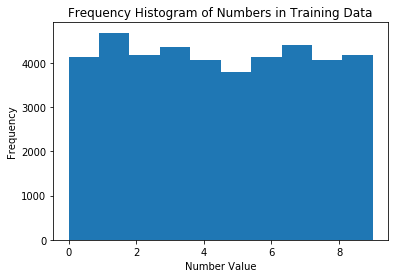

In [4]:
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

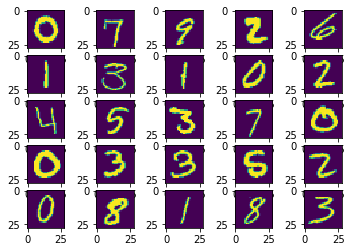

In [5]:
import math
# plot the first 25 digits in the training set. 
f,ax=plt.subplots(5,5)
for i in range(1,26):
    data=train.iloc[i,1:785].values
    nrows,ncols=28,28
    grid=data.reshape((nrows,ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1],n].imshow(grid)

In [6]:
#Normalizing data
label_train=train['label']
tain=train.drop('label',axis=1)
#Normalize data
train=train/255
test=test/255
train['label']=label_train

Text(0,0.5,'% of variance explained')

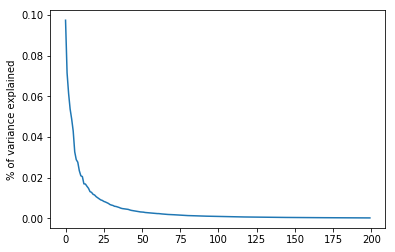

In [7]:
#PCA for compressing features
from sklearn import decomposition
from sklearn import datasets
pca=decomposition.PCA(n_components=200)
pca.fit(train.drop("label",axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("% of variance explained")

In [8]:
pca = decomposition.PCA(n_components=25) 
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']
#decompose test data
#pca.fit(test)
PCtest=pd.DataFrame(pca.transform(test))

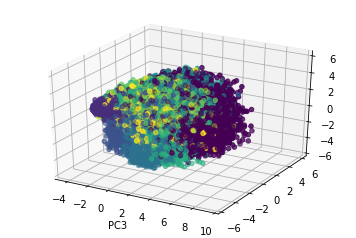

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x=PCtrain[0]
y=PCtrain[1]
z=PCtrain[2]
colors=[int(i%9) for i in PCtrain['label']]
ax.scatter(x,y,z,c=colors,label=colors)
ax.set_xlabel('PC1')
ax.set_xlabel('PC2')
ax.set_xlabel('PC3')
plt.show()

In [10]:
#Neural Network
from sklearn.neural_network import MLPClassifier
y=PCtrain['label'][0:20000]
X=PCtrain.drop('label',axis=1)[0:20000]
#solver=weight
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [11]:
#accuracy and confusion matrix
from sklearn import metrics
predicted=clf.predict(PCtrain.drop('label',axis=1)[20001:42000])
expected=PCtrain['label'][20001:42000]
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2200
          1       0.99      0.99      0.99      2418
          2       0.97      0.98      0.97      2167
          3       0.97      0.95      0.96      2270
          4       0.97      0.97      0.97      2101
          5       0.96      0.97      0.96      2001
          6       0.98      0.99      0.98      2155
          7       0.97      0.98      0.97      2331
          8       0.96      0.96      0.96      2148

In [12]:
submission2=pd.DataFrame(clf.predict(PCtest),columns=['Label'])
submission2.reset_index(inplace=True)
submission2.rename(columns={'index':'ImageId'},inplace=True)
submission2['ImageId']=submission2['ImageId']+1
submission2.to_csv('submission2.csv',index=False)